In [18]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("all_files.csv"))
df.head()

,time,Unnamed: 1,Unnamed: 2,latitude,longitude,depth,mag,magType,nst,gap,...,Year,Month,Day,Eruption_Date,VEI,Lat_Eruption,Lon_Eruption,Lat_dif,Lon_dif,Date_dif
0,2002-08-19T15:03:23.600Z,8/19/2002,T15:03:23.600Z,37.697,14.967,5.0,2.8,md,9.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.037,0.037,9
1,2002-08-19T14:57:59.700Z,8/19/2002,T14:57:59.700Z,37.721,14.963,5.0,2.7,md,8.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.013,0.041,9
2,2002-08-19T12:05:21.700Z,8/19/2002,T12:05:21.700Z,37.708,14.965,5.0,2.8,md,10.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.026,0.039,9
3,2002-08-13T05:29:43.300Z,8/13/2002,T05:29:43.300Z,37.842,14.667,5.0,3.2,md,18.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.108,0.337,15
4,2002-08-13T02:35:50.000Z,8/13/2002,T02:35:50.000Z,37.840,14.662,5.0,2.5,md,5.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.106,0.342,15


In [3]:
target = df["VEI"]
target_names = ["0","1","2","3","4","5","6"]

In [5]:
data = df[['depth','mag','Lat_dif','Lon_dif','Date_dif']]
feature_names = data.columns
data.head()

,depth,mag,Lat_dif,Lon_dif,Date_dif
0,5.0,2.8,0.037,0.037,9
1,5.0,2.7,0.013,0.041,9
2,5.0,2.8,0.026,0.039,9
3,5.0,3.2,0.108,0.337,15
4,5.0,2.5,0.106,0.342,15


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.873972602739726

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8821917808219178

In [9]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.31477293934755446, 'depth'),
 (0.22471012191237325, 'Lon_dif'),
 (0.2010909779770102, 'Lat_dif'),
 (0.13186730437904162, 'Date_dif'),
 (0.1275586563840205, 'mag')]

[Text(82.73240602625299, 211.4, 'X[0] <= 2.848\ngini = 0.619\nsamples = 1093\nvalue = [158, 17, 2, 270, 15, 596, 35]'),
 Text(23.971360381861576, 199.32, 'X[2] <= 0.075\ngini = 0.028\nsamples = 558\nvalue = [2, 0, 0, 5, 1, 550, 0]'),
 Text(17.578997613365157, 187.24, 'X[3] <= 0.205\ngini = 0.014\nsamples = 551\nvalue = [2, 0, 0, 2, 0, 547, 0]'),
 Text(14.382816229116946, 175.16, 'X[1] <= 2.565\ngini = 0.011\nsamples = 550\nvalue = [1, 0, 0, 2, 0, 547, 0]'),
 Text(6.392362768496421, 163.07999999999998, 'X[3] <= 0.011\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 0, 0, 2, 0]'),
 Text(3.1961813842482103, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(9.588544152744632, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(22.373269689737473, 163.07999999999998, 'X[3] <= 0.053\ngini = 0.007\nsamples = 547\nvalue = [0, 0, 0, 2, 0, 545, 0]'),
 Text(15.98090692124105, 151.0, 'X[2] <= 0.048\ngini = 0.004\nsamples = 543\nvalue = [0, 0, 0, 1, 0, 542, 0]

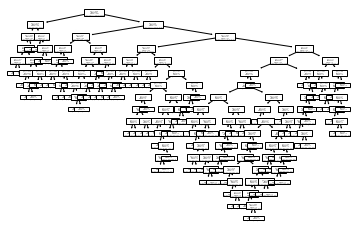

In [11]:
tree.plot_tree(clf)

In [12]:
import graphviz


In [17]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("VEI_Tree")

'VEI_Tree.pdf'

[Text(82.73240602625299, 211.4, 'X[0] <= 2.848\ngini = 0.619\nsamples = 1093\nvalue = [158, 17, 2, 270, 15, 596, 35]'),
 Text(23.971360381861576, 199.32, 'X[2] <= 0.075\ngini = 0.028\nsamples = 558\nvalue = [2, 0, 0, 5, 1, 550, 0]'),
 Text(17.578997613365157, 187.24, 'X[3] <= 0.205\ngini = 0.014\nsamples = 551\nvalue = [2, 0, 0, 2, 0, 547, 0]'),
 Text(14.382816229116946, 175.16, 'X[1] <= 2.565\ngini = 0.011\nsamples = 550\nvalue = [1, 0, 0, 2, 0, 547, 0]'),
 Text(6.392362768496421, 163.07999999999998, 'X[3] <= 0.011\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 0, 0, 2, 0]'),
 Text(3.1961813842482103, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(9.588544152744632, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(22.373269689737473, 163.07999999999998, 'X[3] <= 0.053\ngini = 0.007\nsamples = 547\nvalue = [0, 0, 0, 2, 0, 545, 0]'),
 Text(15.98090692124105, 151.0, 'X[2] <= 0.048\ngini = 0.004\nsamples = 543\nvalue = [0, 0, 0, 1, 0, 542, 0]

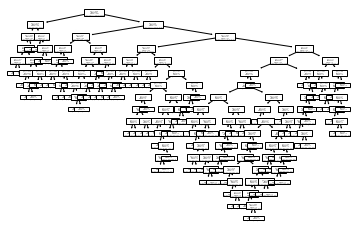

In [21]:
tree.plot_tree(clf)

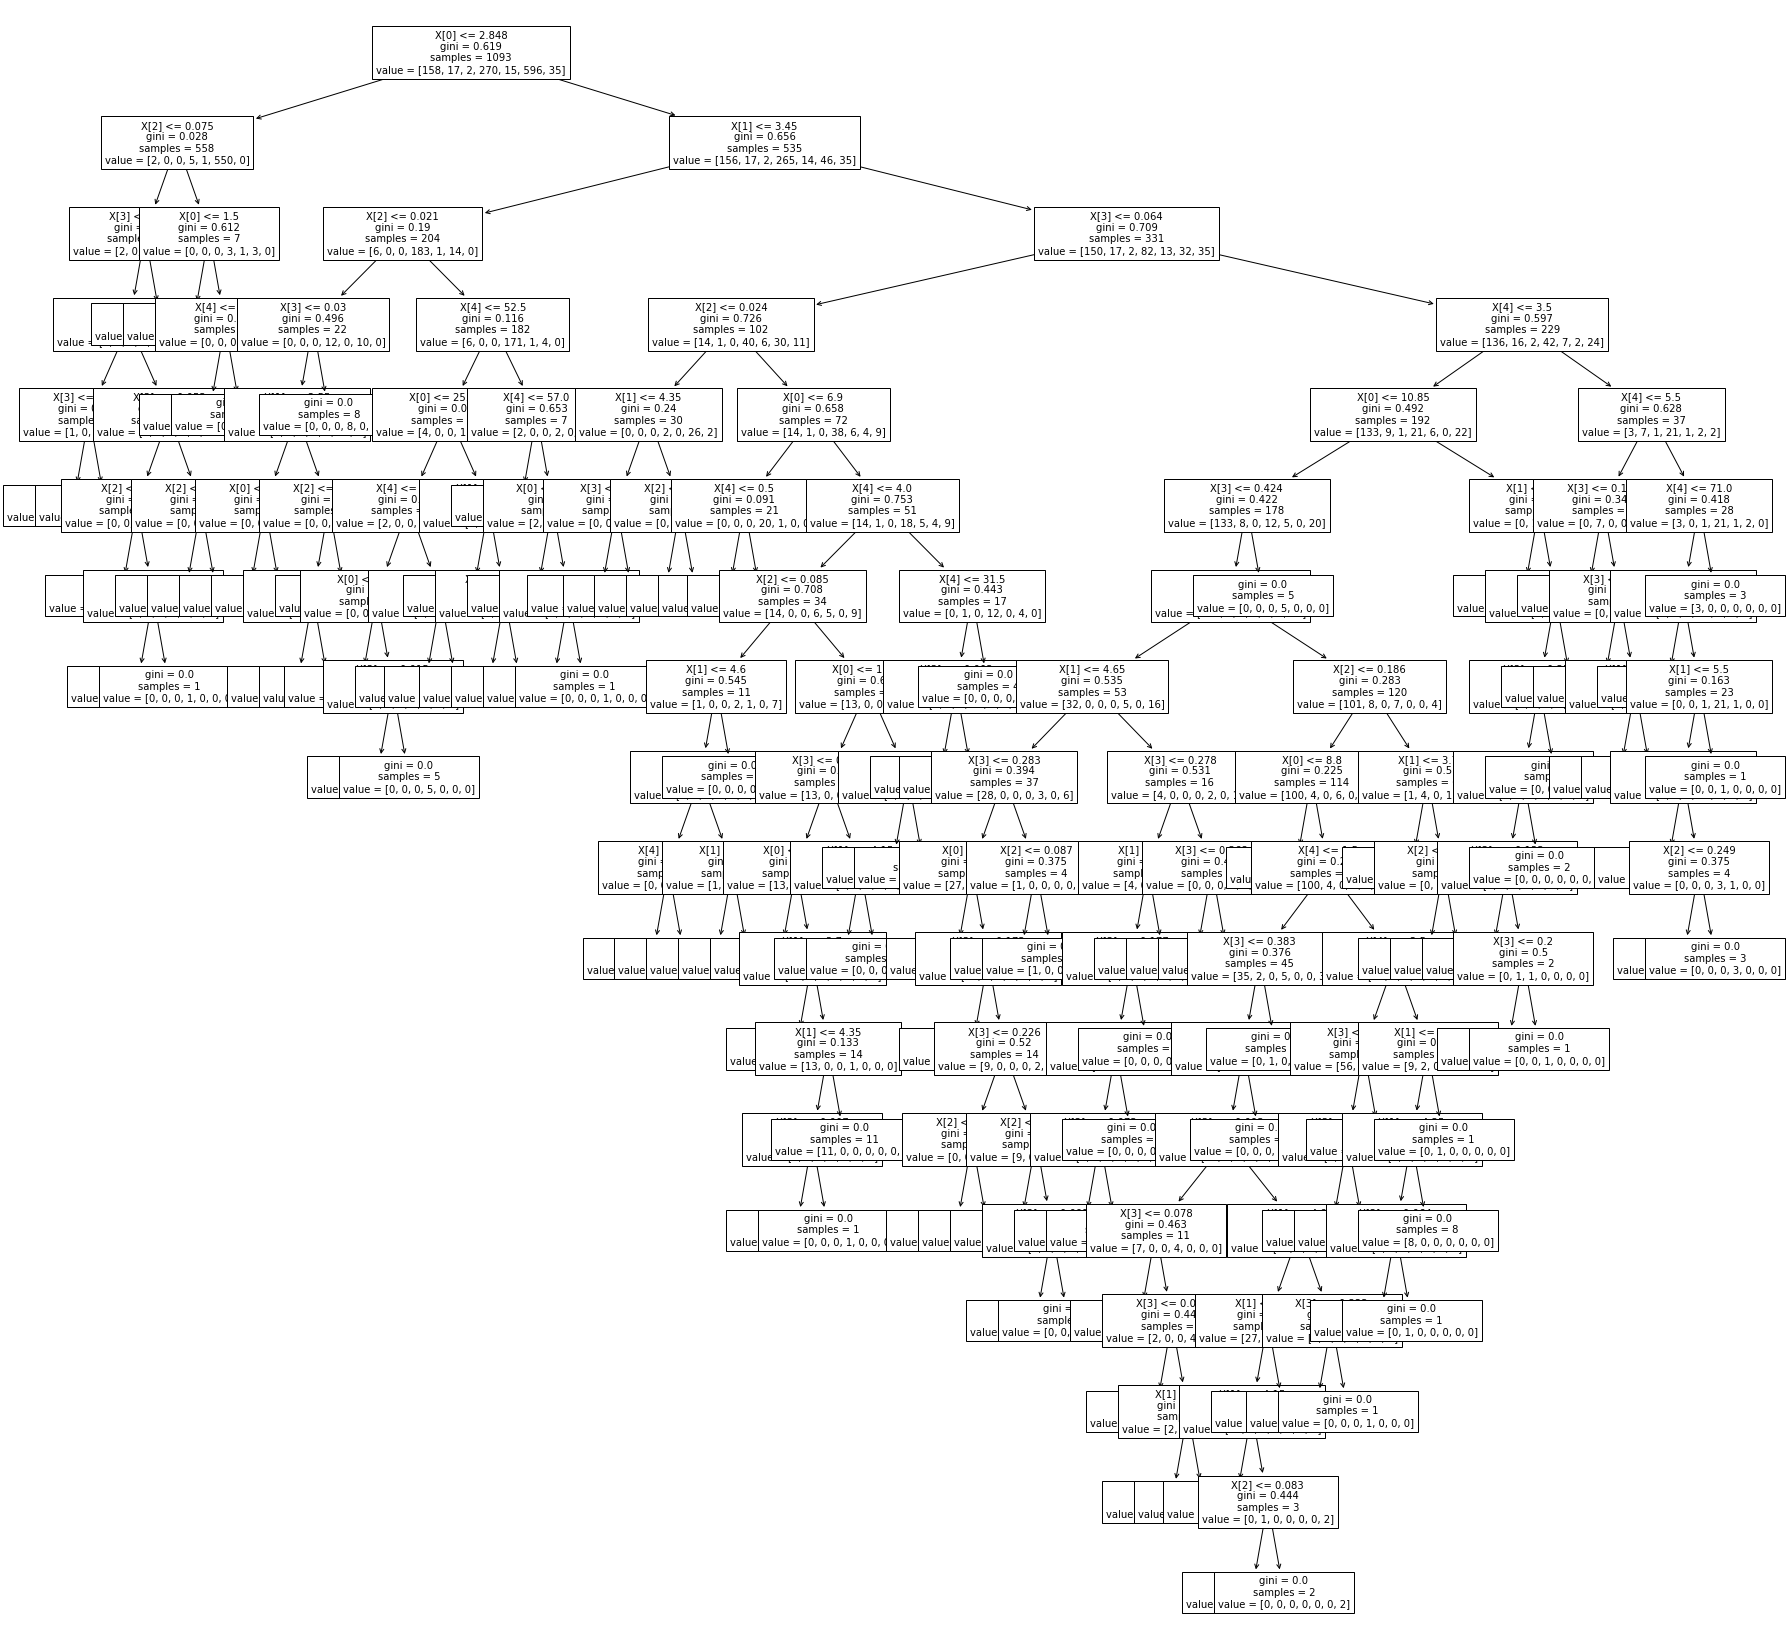

In [26]:
plt.figure(figsize=(30,30))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

In [28]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=clf.feature_names,  
...                      class_names=clf.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names'